In [12]:
# Deze uitwerking van de opdracht is gebaseerd op volgend artikel:
# Özbek, Abdullah Furkan. (2019). How to Train a Model with MNIST dataset. https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84 

In [19]:
# Import needed modules
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Keras modules
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [20]:
# Read training data
raw_data = pd.read_csv("train.csv")

# Convert to numpy array
data = raw_data[0:21000].to_numpy()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_90 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_91 (Dense)             (None, 10)                510       
Total params: 8,910
Trainable params: 8,910
Non-trainable params: 0
_________________________________________________________________
None
Train on 18900 samples, validate on 2100 samples
Epoch 1/10
18900/18900 [==============================] - 2s 97us/step - loss: 0.9072 - acc: 0.7136 - val_loss: 0.4572 - val_acc: 0.8619
Epoch 2/10
18900/18900 [==============================] - 1s 34us/step - loss: 0.3641 - acc: 0.8946 - val_loss: 0.3185 - val_acc: 0.9043
Epoch 3/10
18900/18900 [=============================

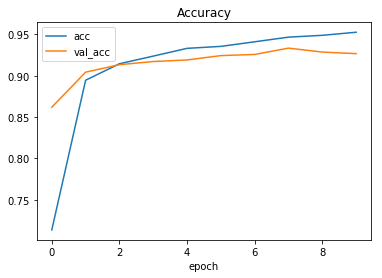

In [43]:
classes = 10
pixels = 784

train = data[0:21000, 1:]
train = train / 255
labels = to_categorical(data[0:21000, 0], 10)

def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = pixels, activation = 'relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = create_model()
print(model.summary())

history = model.fit(train, labels, epochs = 10, validation_split=0.1, batch_size= 500, verbose=1, shuffle=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

print(history.history['acc'])